<img src='https://aims-senegal.org/wp-content/uploads/sites/2/2020/10/aims_senegal.jpg' /></a>

This tutorial is inspired by [Assignment 1](https://web.eecs.umich.edu/~justincj/teaching/eecs498/FA2020/assignment1.html) from the "Deep Learning for Computer Vision EECS 498-007 / 598-005" Course (University of Michigan).



# KNN:

**K** **N**earest **N**eighbors algorithm is a non-parametric supervised learning method that is used to solve classification and regression tasks.

---

The KNN algorithm output is calculated based on the k closest training examples.

---

In classification: the output is a class membership. An object is classified by a majority vote of its neighbors, with the object being assigned to the class most common among its K nearest neighbors (K is a positive integer, typically small). If K = 1, then the object is simply assigned to the class of that single nearest neighbor.

---

In regression: the output is a continous value for the object. This value is the average of the values of k nearest neighbors.

---


# KNN Classifier:

<img src='https://miro.medium.com/max/1400/0*34SajbTO2C5Lvigs.png' />

In KNN a commonly used distance function for continuous variables is **Euclidean distance**. For discrete variables, such as for text classification, another metric can be used, such as the **Hamming distance**.



---



#KNN and decsion boundaries

<img src='https://i.stack.imgur.com/jz0hd.jpg' />

**In this tutorial we will build a KNN based Classfier for the images of CIFAR-10**

[CIFAR-10](https://www.cs.toronto.edu/~kriz/cifar.html) is a widely used dataset in ML practice. It consists of 50000 train images and 10000 test images spanning 10 classes.

The classes are: 'plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'

We will be using pytorch in this tutorial to load the dataset (don't worry about this for now).

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np


# Download CIFAR10 dataset:

In [ ]:

transform = transforms.Compose([transforms.ToTensor()])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                        download=True, transform=transform)

Files already downloaded and verified
Files already downloaded and verified


In [ ]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=50000,
                                          shuffle=True, num_workers=2)
x_train, y_train = next(iter(trainloader))

testloader = torch.utils.data.DataLoader(testset, batch_size=10000,
                                          shuffle=True, num_workers=2)
x_test, y_test = next(iter(testloader))

**In this tutorial we will only use 1000 train samples and 100 test samples**

In [ ]:
x_train = x_train[:1000]
y_train = y_train[:1000]

x_test = x_test[:100]
y_test = y_test[:100]

In [ ]:
x_train.shape, y_train.shape

(torch.Size([1000, 3, 32, 32]), torch.Size([1000]))

In [ ]:
x_test.shape, y_test.shape

(torch.Size([100, 3, 32, 32]), torch.Size([100]))

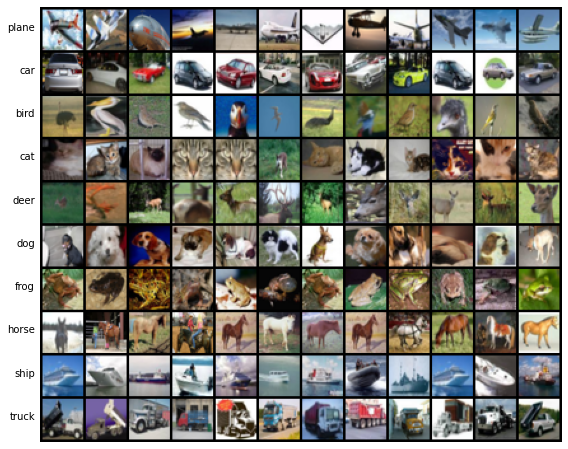

In [ ]:
import random
from torchvision.utils import make_grid
fig = plt.gcf()
fig.set_size_inches(15, 8)
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
samples_per_class = 12
samples = []
for y, cls in enumerate(classes):
  plt.text(-4, 34 * y + 18, cls, ha='right')
  idxs = (y_train == y).nonzero().view(-1)
  for i in range(samples_per_class):
    idx = idxs[random.randrange(idxs.shape[0])].item()
    samples.append(x_train[idx])
img = torchvision.utils.make_grid(samples, nrow=samples_per_class)
plt.imshow(transforms.ToPILImage()(img))
plt.axis('off')
plt.show()

In [ ]:
# Flatten the data

x_train = x_train.reshape(x_train.shape[0], -1).numpy()
y_train = y_train.numpy()

In [ ]:
x_train.shape, y_train.shape

((1000, 3072), (1000,))

In [ ]:
x_test = x_test.reshape(x_test.shape[0], -1).numpy()
y_test = y_test.numpy()
x_test.shape,y_test.shape

((100, 3072), (100,))

# Two Loops KNN Implementaion

In [ ]:
def KNN_two_loops(x_train, x_test):
  
  num_train = x_train.shape[0]
  num_test = x_test.shape[0]
  dist = np.zeros((num_train, num_test))
  list_=[]
 ##############################################################################
  # TODO: Implement this function using a pair of nested loops over the        #
  # training data and the test data.                                           #
  ##############################################################################
  for i in range(num_test):
    for j in range(num_train):
      dist[j,i]=np.sum((x_train[j,:]-x_test[i,:])**2)
  

  
  ##############################################################################
  #                             END OF YOUR CODE                               #
  ##############################################################################
  return   dist

In [ ]:
dist2loops = KNN_two_loops(x_train, x_test)

In [ ]:
dist2loops

array([[343.19787598, 398.92703247, 281.69818115, ..., 454.41867065,
        576.14453125, 480.63201904],
       [591.88214111, 605.27282715, 352.83691406, ..., 699.04919434,
        708.2956543 , 773.95715332],
       [292.46542358, 247.76559448, 332.85037231, ..., 418.74981689,
        497.15515137, 402.67959595],
       ...,
       [501.06036377, 395.9621582 , 367.7243042 , ..., 504.31225586,
        567.83306885, 532.88952637],
       [172.01745605, 134.37374878, 214.83189392, ..., 274.55181885,
        276.09896851, 258.71368408],
       [725.10809326, 717.85107422, 493.50143433, ..., 802.74707031,
        721.51184082, 820.60168457]])

#KNN Vectorized Implementation(No Loop)

In [ ]:

def KNN_no_loop(X_train, X_test):
    '''
    X_train: (n_tr_samples, n_features)
    X_test: (n_ts_samples, n_features)

    '''
    num_train,num_test=X_train.shape[0],X_test.shape[0]
    dist = np.zeros((num_train, num_test))
    
    
  ##############################################################################
  # TODO: Implement this function without loop. #HINT: Try to formulate 
    dist=np.sum((X_train)**2,axis=1) + -2*X_test.dot(X_train.T)+np.sum((X_test)**2,axis=1)[:,np.newaxis]
   
  # the Euclidean distance using two broadcast sums and a matrix multiply.
  ##############################################################################
    
    return  dist.T

    

In [ ]:
KNN_no_loop(x_train,x_test)

array([[343.19812, 398.927  , 281.6985 , ..., 454.41858, 576.14484,
        480.63208],
       [591.8822 , 605.2731 , 352.83704, ..., 699.04944, 708.2959 ,
        773.95715],
       [292.4652 , 247.76562, 332.8501 , ..., 418.74988, 497.15485,
        402.67932],
       ...,
       [501.06042, 395.96228, 367.72412, ..., 504.3125 , 567.8332 ,
        532.8895 ],
       [172.01733, 134.37354, 214.83203, ..., 274.55176, 276.09894,
        258.71375],
       [725.10815, 717.8511 , 493.50134, ..., 802.7471 , 721.5117 ,
        820.60156]], dtype=float32)

##Test the difference in values

In [ ]:
torch.manual_seed(0)
x_train_rand = np.random.randn(100, 3*32*32)
x_test_rand = np.random.randn(100, 3*32*32)

dists_two = KNN_two_loops(x_train_rand, x_test_rand,)
dists_none = KNN_no_loop(x_train_rand, x_test_rand,)
difference = np.sqrt(np.sum(np.power((dists_two - dists_none), 2)))
print('Difference: ', difference)
if difference < 1e-4:
  print('Good! The distance matrices match')
else:
  print('Uh-oh! The distance matrices are different')

Difference:  5.6520540741218967e-11
Good! The distance matrices match


##Bonus:1-Loop Implementation

In [ ]:
def KNN(X_train, X_test):
    '''
    X_train: (n_tr_samples, n_features)
    X_test: (n_ts_samples, n_features)

    '''
    num_train,num_test=X_train.shape[0],X_test.shape[0]
    dist = np.zeros((num_train, num_test))
    
    

  ##############################################################################
  #1-loop implementation
    for i in range(num_test):
      dist[:,i]=np.sum((X_train-X_test[i])**2,axis=1)
    
    return  dist

In [ ]:
KNN(x_train,x_test)

array([[343.19787598, 398.92703247, 281.69818115, ..., 454.41867065,
        576.14453125, 480.63201904],
       [591.88214111, 605.27282715, 352.83691406, ..., 699.04919434,
        708.2956543 , 773.95715332],
       [292.46542358, 247.76559448, 332.85037231, ..., 418.74981689,
        497.15515137, 402.67959595],
       ...,
       [501.06036377, 395.9621582 , 367.7243042 , ..., 504.31225586,
        567.83306885, 532.88952637],
       [172.01745605, 134.37374878, 214.83189392, ..., 274.55181885,
        276.09896851, 258.71368408],
       [725.10809326, 717.85107422, 493.50143433, ..., 802.74707031,
        721.51184082, 820.60168457]])

# Loops vs Vectorization: Speed Test

In [ ]:
%timeit  KNN(x_train, x_test)


1 loop, best of 5: 557 ms per loop


In [ ]:
%timeit  KNN_two_loops(x_train, x_test,)

1 loop, best of 5: 1.43 s per loop


In [ ]:
print(f'The Vectorized Inplementaion is {(1.39*1000)/28.2:.2f} times faster than using loops')

The Vectorized Inplementaion is 49.29 times faster than using loops


#Predict Labels

In [ ]:
from collections import Counter

In [ ]:
def predict_labels(dists, y_train, k=1):
  """
  Given distances between all pairs of training and test samples, predict a
  label for each test sample by taking a **majority vote** among its k nearest
  neighbors in the training set.


  Inputs:
  - dists: array of shape (num_train, num_test) where dists[i, j] is the
    squared Euclidean distance between the ith training point and the jth test
    point.
  - y_train: array shape (num_train,) giving labels for all training
    samples. Each label is an integer in the range [0, num_classes - 1]
  - k: The number of nearest neighbors to use for classification.

  Returns:
  - y_pred: array of shape (num_test,) giving predicted labels
    for the test data, where y_pred[j] is the predicted label for the jth test
    example. Each label should be an integer in the range [0, num_classes - 1].
  """
  y_pred=[]
  
  num_train, num_test = dists.shape
 
  ##############################################################################
  # TODO: Implement this function. You may use an explicit loop over the test  #
  # HINT: look for Counters in python 
  ##############################################################################
  for i in range(num_test):

    #we sort a list
    sort_list=np.argsort(dists[:,i])

    nearest_neighbor = y_train[sort_list[:k]]

    y_pred.append(Counter(nearest_neighbor).most_common()[0][0])



  return np.array(y_pred)
  ##############################################################################
  #                             END OF YOUR CODE                               #
  ##############################################################################
  



###Test your predict label method

In [ ]:
dists = torch.tensor([
    [0.3, 0.4, 0.1],
    [0.1, 0.5, 0.5],
    [0.4, 0.1, 0.2],
    [0.2, 0.2, 0.4],
    [0.5, 0.3, 0.3],
])
y_train2 = np.array([0, 1, 0, 1, 2])
y_pred_expected2 =np.array([1, 0, 0])
y_pred2 = predict_labels(dists, y_train2, k=3)
correct = y_pred2.tolist() == y_pred_expected2.tolist()
print('Correct: ', correct)

Correct:  True


#Build complete KNN classifier 

In [ ]:

class KnnClassifier:
  def __init__(self, x_train, y_train):
    """
    Create a new K-Nearest Neighbor classifier with the specified training data.
    In the initializer we simply memorize the provided training data.

    Inputs:
    - x_train:  training data
    - y_train:  training labels
    """
    ###########################################################################
    # TODO: Implement the initializer for this class. It should perform no    #
    # computation and simply memorize the training data.                      #
    ###########################################################################
    self.x_train=x_train
    self.y_train=y_train

    ###########################################################################
    #                           END OF YOUR CODE                              #
    ###########################################################################

  def predict(self, x_test, k=1):
    """
    Make predictions using the classifier.Use your predict label and KNN functions defined before

    Inputs:
    - x_test:  test samples
    - k: The number of neighbors to use for predictions

    Returns:
    - y_test_pred: array of shape (num_test,) giving predicted labels
      for the test samples.
    """
    y_test_pred = np.zeros(x_test.shape[0])
    num_test=x_test.shape[0]
    ###########################################################################
    # TODO: Implement this method. You should use the functions you wrote     #
    # above for computing distances (use the no-loop variant) and to predict  #
    # output labels.

    dists=KNN_no_loop(self.x_train,x_test)
    y_test_pred = predict_labels(dists, self.y_train, k=1)

    # for i in range(num_test):
    #   #we sort a list
    #   sort_list=np.argsort(dists[:,i])

    #   nearest_neighbor=y_train[sort_list[:k]]

    #   y_test_pred[i]=Counter(nearest_neighbor).most_common()[0][0]



    return y_test_pred #np.array(y_test_pred)



  
    ###########################################################################
  
    ###########################################################################
    #                           END OF YOUR CODE                              #
    ###########################################################################
    

  def check_accuracy(self, x_test, y_test, k=1):
    """
    Utility method for checking the accuracy of this classifier on test data.
    Returns the accuracy of the classifier on the test data, and also prints a
    message giving the accuracy.

    Inputs:
    - x_test:  test samples
    - y_test: test labels
    - k: The number of neighbors to use for prediction
   
    Returns:
    - accuracy: Accuracy of this classifier on the test data, as a percent.
      Python float in the range [0, 100]
    """
    ############################################################################
    # TODO: Implement this method. 

    # y_pred=self.predict(x_test,k)

    # accuracy=(y_pred==y_test).sum()/len(y_test)

    return (np.sum(y_test==self.predict(x_test,k))/x_test.shape[0])*100

    # print('The accuracy of our model with k={} is {}%'.format(k,accuracy*100))
    ###########################################################################

  


###Test your accuracy on CIFAR10

In [ ]:
classifier = KnnClassifier(x_train, y_train)
classifier.check_accuracy(x_test, y_test, k=1)

24.0

In [ ]:
classifier = KnnClassifier(x_train, y_train)
classifier.check_accuracy(x_test, y_test, k=5)

24.0

###Is there is any improvement between k=1 and k=5 ? if not , can we improve more?

There's an improvement, but it can still be improved with probably higher values of k.